# Analysis
- Baseline data, Random strategy, 10x (results_baseline.csv)
- 


In [632]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
%matplotlib inline


DIR = 'src/results/*'

frames = []
files = glob.glob(DIR)
for f in files:
    frames.append(pd.read_csv(f))
    
df = pd.concat(frames)

df['dataset'] = df.apply(lambda row: row.file_name.split('/')[7].replace('.txt','').replace('.sdk', ''), axis=1)
df = df.groupby(['file_name', 'strategy', 'dataset'], as_index=False).mean()
df.columns
df = df[df['givens'] < 29]
df

,file_name,strategy,dataset,splits,backtracks,clauses,variables,givens,pos,neg,unit_rule,pure_rule,execution_time
0,/Users/spijkervet/Desktop/test_data/cnf/sudoku...,Grab First,1000-sudokus,58,56,12010,729,22,108135,302911,115,115,3.765865
1,/Users/spijkervet/Desktop/test_data/cnf/sudoku...,Grab First,1000-sudokus,0,0,12011,729,23,2939,23328,1,1,2.181050
2,/Users/spijkervet/Desktop/test_data/cnf/sudoku...,Grab First,1000-sudokus,0,0,12011,729,23,2939,23328,1,1,2.106979
3,/Users/spijkervet/Desktop/test_data/cnf/sudoku...,Grab First,1000-sudokus,4,1,12011,729,23,7769,36036,6,6,2.227630
4,/Users/spijkervet/Desktop/test_data/cnf/sudoku...,Grab First,1000-sudokus,7,5,12011,729,23,12149,43156,13,13,2.305142
5,/Users/spijkervet/Desktop/test_data/cnf/sudoku...,Grab First,1000-sudokus,0,0,12011,729,23,2939,23328,1,1,2.370034
6,/Users/spijkervet/Desktop/test_data/cnf/sudoku...,Grab First,1000-sudokus,0,0,12011,729,23,2939,23328,1,1,2.246386
7,/Users/spijkervet/Desktop/test_data/cnf/sudoku...,Grab First,1000-sudokus,0,0,12011,729,23,2939,23328,1,1,2.272884
8,/Users/spijkervet/Desktop/test_data/cnf/sudoku...,Grab First,1000-sudokus,106,105,12011,729,23,165250,458805,212,212,4.970919
9,/Users/spijkervet/Desktop/test_data/cnf/sudoku...,Grab First,1000-sudokus,0,0,12010,729,22,2938,23328,1,1,2.381533


In [633]:
splits = df.groupby(['dataset', 'strategy'])['splits']
backtracks = df.groupby(['dataset', 'strategy'])['backtracks']
givens = df.groupby(['dataset', 'strategy'])['givens']
execution_time = df.groupby(['dataset', 'strategy'])['execution_time']

print(givens.var())

dataset       strategy  
1000-sudokus  DLIS          0.250000
              Grab First    1.519562
damnhard      Grab First    0.000000
Name: givens, dtype: float64


In [638]:
df.groupby('dataset')['pos'].mean() / df.groupby('dataset')['neg'].mean()
# print(b1acktracks.mean(), backtracks.std())

# print(backtracks.mean(), backtracks.std())
# print(givens.mean(), givens.std())
# print(unit_rule.mean(), unit_rule.std())
# print(pure_rule.mean(), pure_rule.std())

dataset
1000-sudokus    0.290949
damnhard        0.289890
dtype: float64

In [635]:
print(backtracks.mean())

dataset       strategy  
1000-sudokus  DLIS          121.750000
              Grab First      5.811245
damnhard      Grab First     15.500000
Name: backtracks, dtype: float64


dataset       strategy  
1000-sudokus  DLIS          0.500000
              Grab First    1.232705
damnhard      Grab First    0.000000
Name: givens, dtype: float64


Text(0.5, 0.98, '')

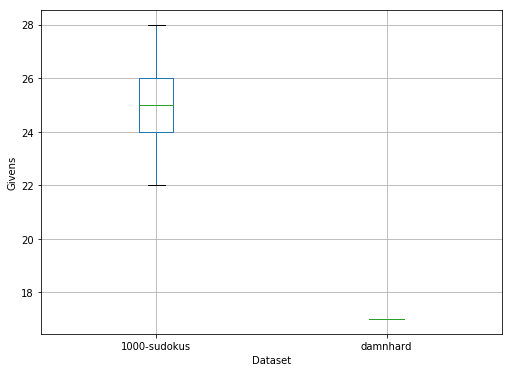

In [636]:
print(givens.std())
df.boxplot(column='givens',by='dataset', figsize=(8,6))
plt.title("")
plt.xlabel('Dataset')
plt.ylabel('Givens')
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

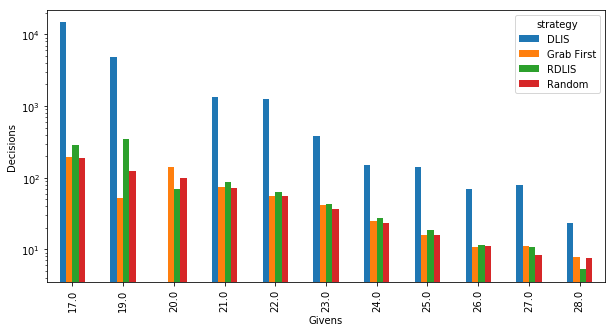

In [586]:
# sns.distplot(df[df['splits'] < 100]['splits'])
means = df.groupby(['givens', 'strategy'], as_index=False).mean()
# means = means[means['splits'] < 1000]
# means = means[~means.strategy.str.match("DLIS")]
bar = means.groupby(['strategy', 'givens'], as_index=False)['splits'].sum()
bar.pivot_table('splits', index='givens', columns='strategy').plot(kind='bar', figsize=(10,5))
plt.xlabel('Givens')
plt.ylabel('Decisions')
plt.yscale('log')

In [578]:
test_df = df
test_df = test_df.groupby(['file_name', 'givens', 'strategy'], as_index=False).mean()
test_df = test_df.set_index('file_name')
test_df['gf_performance'] = test_df[test_df['strategy'] == 'Grab First']['splits'] / test_df[test_df['strategy'] == 'Random']['splits']
test_df['dlis_performance'] = test_df[test_df['strategy'] == 'DLIS']['splits'] / test_df[test_df['strategy'] == 'Random']['splits']
test_df['rdlis_performance'] = test_df[test_df['strategy'] == 'RDLIS']['splits'] / test_df[test_df['strategy'] == 'Random']['splits']

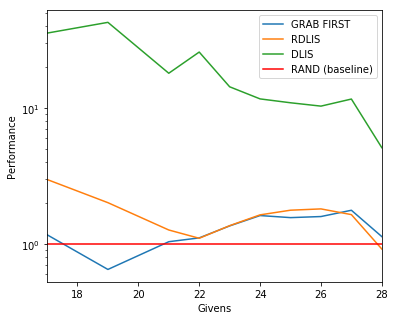

In [579]:
# custom = test_df[test_df.dataset.str.match("top870")]
test_df = test_df[test_df['dlis_performance'] < 100]

plt.figure(figsize=((6,5)))
test_df.groupby('givens')['gf_performance'].mean().plot()
# test_df.groupby('givens')['dlis_performance'].mean().plot()
test_df.groupby('givens')['rdlis_performance'].mean().plot()
test_df.groupby('givens')['dlis_performance'].mean().plot()

plt.axhline(y=1, color='r', linestyle='-', label='Baseline')
plt.yscale("log")
plt.legend(['GRAB FIRST','RDLIS','DLIS', 'RAND (baseline)'])
plt.xlabel('Givens')
plt.ylabel('Performance')
plt.show()

# custom = custom[~custom.strategy.str.match("DLIS")]
# custom.groupby(['givens','strategy']).mean()['gf_performance'].unstack().plot()

[1.4964947509335587, 1.67470908508594, 1.2854398243447234, 1.2076194905638438, 1.1921626582355491, 1.1846134682134233, 1.0700272859857942, 1.3583865857760138, 1.0052492091989398]


Text(0, 0.5, 'Decisions')

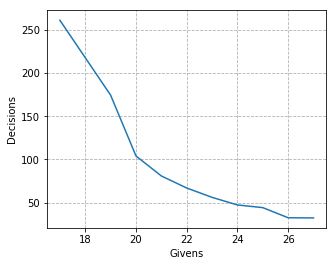

In [580]:
custom = df[~df.strategy.str.match('DLIS')]
custom = custom[custom.dataset.str.match("top870")]
cg = custom.groupby(['givens']).mean()['splits']
# print(cg.diff(periods=-1))

print(ratios)
plt.figure(figsize=(5,4))
plt.plot(cg)
plt.grid(linestyle='--')
plt.xlabel("Givens")
plt.ylabel("Decisions")

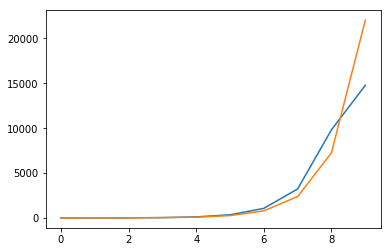

In [339]:
# x = np.linspace(0,10,10)
# y = np.exp(x)
# g = np.gradient(y)
# plt.plot(g)
# plt.plot(y)

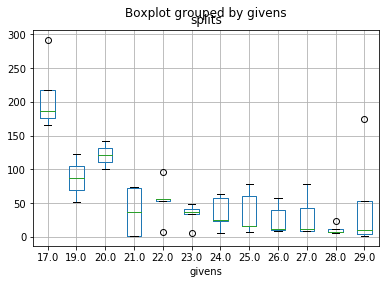

In [118]:
df.boxplot('splits', 'givens')

In [7]:
from collections import defaultdict

def make_bins(datadict, bin_size = 20):
    bins = defaultdict(int)
    for index, row in datadict.iterrows():
        b = int(row['splits'] / bin_size)
        bins[b] += 1
    return bins

bins = make_bins(golden_standard)

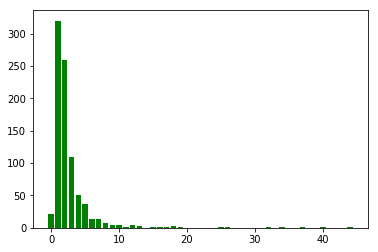

In [8]:
plt.bar(list(bins.keys()), bins.values(), color='g')
plt.show()

In [9]:
print(sorted(list(bins.keys()))[0:10])
print(bins.values())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
dict_values([2, 2, 51, 260, 8, 37, 109, 320, 5, 3, 14, 13, 1, 2, 4, 2, 4, 1, 3, 2, 22, 1, 1, 1, 1, 1])


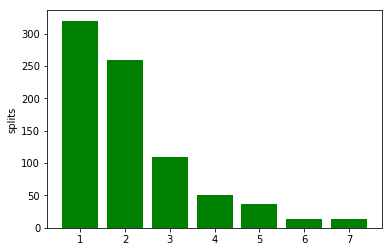

In [10]:
# TEST DATA MOEILIJKHEIDS VERDELING
def reduce_bins(bins, i,j):
    newbins = {}
    for item in sorted(list(bins.keys()))[i:j]:
        newbins[item] = bins[item]
    return newbins

new_bins = reduce_bins(bins, 1,8)
plt.bar(list(new_bins), new_bins.values(), color='g')
# plt.savefig('Bins_baseline_splits.png')
plt.ylabel("splits")
plt.show()

In [11]:
# Inlezen rdlis
df = pd.read_csv('results_rdlis.csv')
rdlis = df.groupby('file_name').mean()
print(rdlis.columns)

# Inlezen grab_first
df = pd.read_csv('results_grab_first.csv')
grab_first = df.groupby('file_name').mean()
print(grab_first.columns)

Index(['splits', 'backtracks', 'clauses', 'variables', 'givens', 'unit_rule',
       'pure_rule', 'execution_time'],
      dtype='object')
Index(['splits', 'backtracks', 'clauses', 'variables', 'givens', 'unit_rule',
       'pure_rule', 'execution_time'],
      dtype='object')


1.1156022477056637
[0.6507619285535848, 2.0067084730931892, 0.30434782608695654, 0.6936416184971098, 0.6375838926174496, 2.5045871559633026, 0.6755260243632337, 2.032258064516129, 0.44176706827309237, 0.3202846975088968]
[800.6, 685.7, 92.0, 51.9, 178.8, 109.0, 90.3, 62.0, 49.8, 84.3]


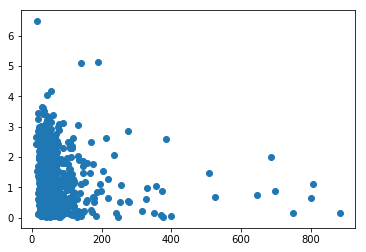

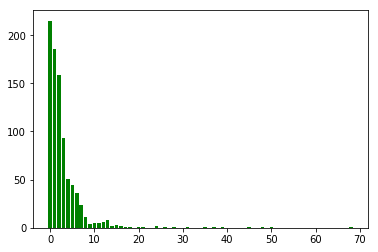

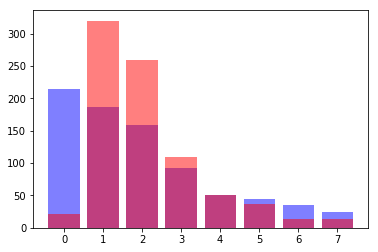

In [14]:
#Grab first
performance = []
for i, item in enumerate(grab_first["splits"]):
    performance += [item/golden_standard['splits'][i]]

print(sum(performance)/len(performance))
    
print(performance[0:10])
print(list(golden_standard["splits"])[0:10])
plt.scatter(list(golden_standard["splits"]), performance)
plt.show()
    
grab = make_bins(grab_first)
plt.bar(list(grab), grab.values(), color='g')
plt.show()

grab = reduce_bins(grab, 0,8)
new_bins = reduce_bins(bins, 0,8)
plt.bar(list(grab.keys()), grab.values(), color="b",alpha=0.5)
plt.bar(list(new_bins.keys()), new_bins.values(), color='r',alpha=0.5)
plt.show()

In [13]:
table with ave

SyntaxError: invalid syntax (<ipython-input-13-c12940a4f890>, line 1)

In [151]:
splits_rdlis = rdlis['splits']
backtracks_rdlis = rdlis['backtracks']
givens_rdlis = rdlis['givens']
unit_rule_rdlis = rdlis['unit_rule']
pure_rule_rdlis = rdlis['pure_rule']
pure_rule_rdlis = rdlis['pure_rule']

In [152]:
print(splits_rdlis.mean(), splits_rdlis.std())
print(backtracks_rdlis.mean(), backtracks_rdlis.std())
print(givens_rdlis.mean(), givens_rdlis.std())
print(unit_rule_rdlis.mean(), unit_rule_rdlis.std())
print(pure_rule_rdlis.mean(), pure_rule_rdlis.std())

75.93264367816091 99.36903411057449
72.25724137931034 98.98799586286927
22.836781609195402 2.161708554893838
149.18988505747126 198.35528681008321
149.18988505747126 198.35528681008321


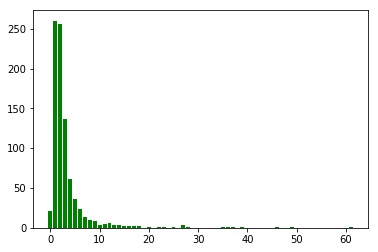

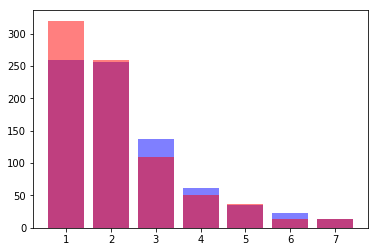

In [153]:
bins_rdlis = make_bins(rdlis)
plt.bar(list(bins_rdlis.keys()), bins_rdlis.values(), color='g')
plt.show()

new_bins_rdlis = reduce_bins(bins_rdlis, 1,8)
plt.bar(list(new_bins_rdlis.keys()), new_bins_rdlis.values(), color="b",alpha=0.5)
plt.bar(list(new_bins.keys()), new_bins.values(), color='r',alpha=0.5)
plt.show()